In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev, BSpline
import sys
sys.path.append('../')
from package_global_functions import *
from filesHandling_quenched import *
from percolationAnalysis import getMeanClusterSize_ir

In [26]:
arena_r, exclusion_r, Ns = 20.0, 1.5, [10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
#Ns = [35, ]
push = False
pushLabel = 'nopush'
around_max = 3

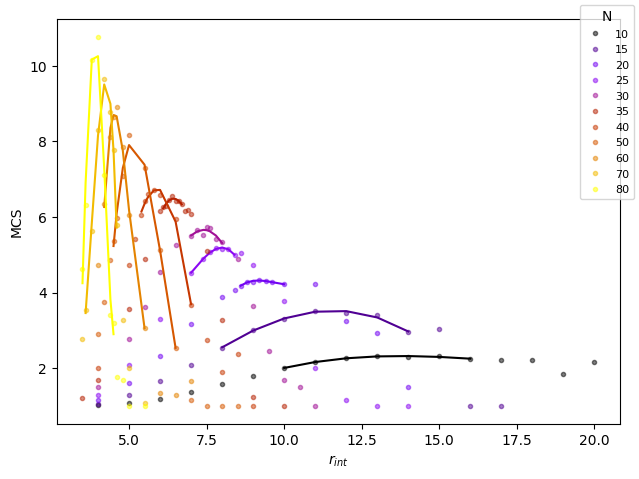

In [27]:
fig, ax = plt.subplots()
colors = plt.cm.gnuplot(np.linspace(0,1,len(Ns)))
percs_from_spline = []
ax.set(xlabel=r'$r_{int}$', ylabel='MCS')
for N,color in zip(Ns, colors):
    irs = availableIrs(N, arena_r, exclusion_r, push)
    dfmcs = getMeanClusterSize_ir(N, arena_r, exclusion_r, irs, push)
    ax.plot(dfmcs['interac_r'], dfmcs['mcs'], label=f'{N}', marker='.', lw=0.8, color=color, alpha=0.5, ls='None')
    maxMCS = max(dfmcs['mcs'])
    i = dfmcs[dfmcs.mcs == maxMCS].index[0]
    irs_spline, mcs_spline = np.array(dfmcs.iloc[i-around_max:i+around_max+1].interac_r), np.array(dfmcs.iloc[i-around_max:i+around_max+1].mcs)
    tck_s = splrep(irs_spline, mcs_spline, s=1)
    ax.plot(irs_spline, BSpline(*tck_s)(irs_spline), '-', color=color)
    #Ninterp = len(irs_spline[:-1])*3+1
    #irs_interp = np.linspace(irs_spline[0],irs_spline[-1],Ninterp)
    irs_interp = np.linspace(irs_spline[0],irs_spline[-1],500)
    mcs_interp = splev(irs_interp,tck_s)
    maxMCS = max(mcs_interp)
    index_maxMCS = max(range(len(mcs_interp)), key=mcs_interp.__getitem__)
    perc_ir = irs_interp[index_maxMCS]
    percs_from_spline.append(perc_ir)
fig.legend(title='N', fontsize=8)
fig.tight_layout()
fig.savefig(f'MCS_difN_ar_{arena_r}_er_{exclusion_r}_{pushLabel}_splineMAX.png')

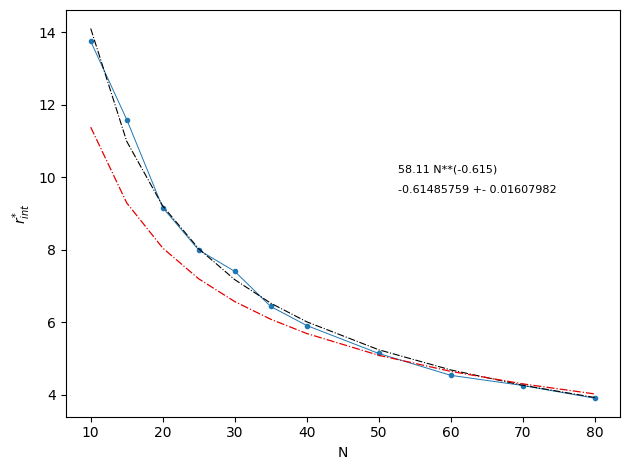

In [30]:
from scipy.optimize import curve_fit

logscale = False

def powerLaw(x,a,b):
    return a*x**b

paramfit, covfit = curve_fit(powerLaw, Ns, percs_from_spline)
fit = powerLaw(Ns, *paramfit)
fig, ax = plt.subplots()
ax.plot(Ns, percs_from_spline, marker='.', lw=0.7)
ax.plot(Ns, fit, ls='-.', lw=0.8, color='k')
ax.plot(Ns, 36*np.array(Ns)**(-1/2), ls='-.', color='xkcd:red', lw=0.9)
ax.text(0.6, 0.6, rf'{round(paramfit[0],3)} N**({round(paramfit[1],3)})', fontsize=8, color='k', transform=ax.transAxes)
ax.text(0.6, 0.55, rf'{round(paramfit[1],8)} +- {round(np.sqrt(covfit[1,1]),8)}', fontsize=8, color='k', transform=ax.transAxes)
ax.set(xlabel='N', ylabel=r'$r_{int}^{*}$')
fig.tight_layout()
figname = f'percR_MCS_difN_ar_{arena_r}_er_{exclusion_r}_{pushLabel}'
if logscale:
    figname += '_logscale'
figname += '_from_splineMAX.png'
fig.savefig(figname)

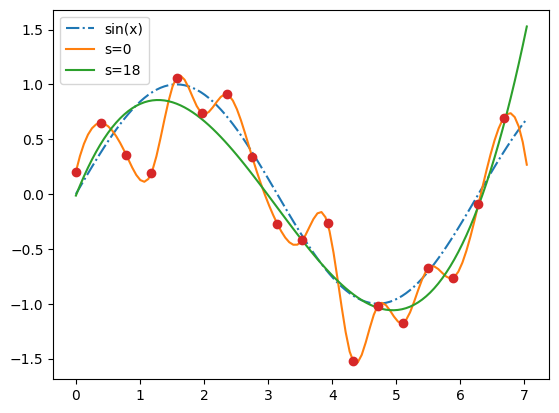

In [8]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/16)
rng = np.random.default_rng()
y =  np.sin(x) + 0.4*rng.standard_normal(size=len(x))

tck = splrep(x, y, s=0)
tck_s, fp_s, ier, msg = splrep(x, y, s=len(x), full_output=True)
xnew = np.arange(0, 9/4, 1/50) * np.pi
plt.plot(xnew, np.sin(xnew), '-.', label='sin(x)')
plt.plot(xnew, BSpline(*tck)(xnew), '-', label='s=0')
plt.plot(xnew, BSpline(*tck_s)(xnew), '-', label=f's={len(x)}')
plt.plot(x, y, 'o')
plt.legend()
plt.show()

In [57]:
from scipy.interpolate import make_interp_spline
bspl = make_interp_spline(x, y, k=3)

In [59]:
len(bspl.t)

22

In [4]:
tck

(array([0.        , 0.        , 0.        , 0.        , 0.78539816,
        1.17809725, 1.57079633, 1.96349541, 2.35619449, 2.74889357,
        3.14159265, 3.53429174, 3.92699082, 4.3196899 , 4.71238898,
        5.10508806, 5.49778714, 5.89048623, 6.67588439, 6.67588439,
        6.67588439, 6.67588439]),
 array([ 0.27576655,  0.15255143,  0.40182164,  2.42312808, -0.34206881,
         2.02724756, -0.03091646,  0.32538354, -0.5491446 , -0.0322087 ,
        -0.83756899, -1.56942177, -3.03830252, -0.4167391 , -1.20717349,
         2.33327367, -1.7596697 , -0.23157549,  0.        ,  0.        ,
         0.        ,  0.        ]),
 3)

In [5]:
tck_s

(array([0.        , 0.        , 0.        , 0.        , 6.67588439,
        6.67588439, 6.67588439, 6.67588439]),
 array([ 0.30113925,  3.3799971 , -4.63525303,  0.57046603,  0.        ,
         0.        ,  0.        ,  0.        ]),
 3)

In [9]:
fp_s

1.6378728481895413